##3) Using semantic vectors to decode brain activation

### Load the data

In [1]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2024-08-27 13:42:09--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M  61.7MB/s    in 1.5s    

2024-08-27 13:42:12 (61.7 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
replace stimuli_180concepts.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace learn_decoder.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace vectors_180concepts.GV42B300.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace imaging_data.csv? [y]

In [2]:
import os

# Save the current working directory
original_working_directory = os.getcwd()
print("Original working directory:", original_working_directory)

Original working directory: /content


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/project_lcc')
os.listdir('.')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['glove.42B.300d.txt',
 'vectors_384sentences.GV42B300.average.txt',
 'vectors_243sentences.GV42B300.average.txt',
 'stimuli_384sentences.txt',
 'stimuli_243sentences.txt',
 'EXP3.pkl',
 'neuralData_for_EXP1.csv',
 'EXP2.pkl',
 'stimuli_180concepts.txt',
 'learn_decoder.py',
 'vectors_180concepts.GV42B300.txt',
 'imaging_data.csv',
 '__pycache__',
 'colab_pdf.py']

In [4]:
import pandas as pd

neural_data_exp1 = pd.read_csv('neuralData_for_EXP1.csv', index_col=0)
print(neural_data_exp1.head())


           0          1          2          3          4         5         6  \
0  -8.173708  -5.593922  -4.737303  -3.210317  -5.064872 -2.867938 -0.647879   
1  14.175880  12.258254  15.118346  16.929986  14.128274  7.703238  5.102477   
2  11.025751   9.451916  11.282665  10.330555   9.168634  6.326451  8.325448   
3  -9.224141 -10.744989 -12.231927  -9.563610  -2.367995 -2.873559 -2.707560   
4 -11.051150 -14.732372 -17.551868 -14.449508  -8.301250 -5.309789 -3.145870   

           7          8          9  ...     185856     185857     185858  \
0   0.630494   4.112772   7.625108  ...  23.007180  15.161489 -10.211452   
1   7.847398  13.293932  18.975664  ...  32.169971  23.818106  11.242535   
2  11.559850  10.385498  11.301625  ...  11.159157   5.839374 -29.386549   
3  -2.943065  -0.751547   0.859832  ...  22.441511  20.071060  12.036822   
4  -6.857210 -13.070992 -13.807587  ...   4.275233  -3.619274 -14.709950   

      185859     185860     185861     185862     185863     1

In [5]:
with open('stimuli_243sentences.txt', 'r') as file:
    stimuli_243sentences = file.read()
print(stimuli_243sentences)

Beekeeping encourages the conservation of local habitats.
It is in every beekeeper's interest to conserve local plants that produce pollen.
As a passive form of agriculture, it does not require that native vegetation be cleared to make way for crops.
Beekeepers also discourage the use of pesticides on crops, because they could kill the honeybees.
Artisanal beekeepers go to extremes for their craft, but their product is worth the effort.
Artisanal honey-making emphasizes quality and character over quantity and consistency.
To produce the finest honey, beekeepers become micromanagers of their honeybees.
They scout the fields, know when nectar flows, and select the best ways to extract honey.
As the beekeeper opens the hive, the deep hum of 40,000 bees fills the air.
The beekeeper checks honey stores, pollen supplies, and the bee nursery.
Bees crawl across his bare arms and hands, but they don't sting, because they're gentle.
I have a recurring dream about exams, even though I'm no longer

In [6]:
with open('stimuli_384sentences.txt', 'r') as file:
    stimuli_384sentences = file.read()
print(stimuli_384sentences)

An accordion is a portable musical instrument with two keyboards.
One keyboard is used for individual notes, the other for chords.
Accordions produce sound with bellows that blow air through reeds.
An accordionist plays both keyboards while opening and closing the bellows.
An apartment is a self-contained home that is part of a building.
An apartment may have one or more rooms, as well as a kitchen and a bathroom.
Some apartments are for single people, others for families.
The building can have a garage, a laundry facility or extra storage space.
An apple is a fruit that can be green, red or yellow.
Apples have thin skin, a crisp, sweet pulp and seeds inside.
Some very tart apples are used to make cider.
Apples can be eaten raw, roasted or baked in pies.
Arson is the criminal act of burning a building or wildland.
A fire investigation determines if a fire was caused by accident or arson.
Arson can be done to cause damage to others or collect insurance.
The severity of the crime depends

In [7]:
from learn_decoder import *
vectors_243 = read_matrix('vectors_243sentences.GV42B300.average.txt', sep=" ")
# print(vectors_243.head())

vectors_384 = read_matrix('vectors_384sentences.GV42B300.average.txt', sep=" ")
# print(vectors_384.head())


In [8]:
import pickle

with open('EXP3.pkl', 'rb') as f:
    exp3_data = pickle.load(f)
    print(exp3_data.keys())

with open('EXP2.pkl', 'rb') as f:
    exp2_data = pickle.load(f)
    print(exp2_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])
dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


In [9]:

# Change back to the default working directory
os.chdir('/content')
# Confirm the change
print("Returned to the default working directory:", os.getcwd())

Returned to the default working directory: /content


In [10]:
#Let's load the functions from learn_decoder.py
from learn_decoder import *

#and the data
data = read_matrix("imaging_data.csv", sep=",")
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts

In [11]:
type(data)

numpy.ndarray

You can verify for your self what learn_decoder consists of by going to Files and opening it.

### What are the Accuracy scores?

Define a function that computes rank-based accuracy score, then, iterate over the 18 folds. For each fold,  train the decoder **using the `learn_decoder` function** (the function is already imported from `learn_decoder.py`) on the fold train data, obtain the predicions on the fold test data, and store both the accuracy score of each concept (use the labels from `concepts`) as well as the average score of the 10 concepts.  

In [12]:
# import numpy as np
# import random

# seed = 42
# indices = list(range(180))

# def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
#     dot_prod = np.dot(x, y)
#     norm_prod = np.linalg.norm(x) * np.linalg.norm(y)
#     return dot_prod / norm_prod

# folds_avg_ranks = []
# concept_rank = []

# for fold_i in range(18):
#     test_inds = indices[fold_i * 10 : (fold_i + 1) * 10]
#     train_inds = indices[:fold_i * 10] + indices[(fold_i + 1) * 10:]

#     data_test_vectors = np.take(data, test_inds, axis=0)
#     data_train_vectors = np.take(data, train_inds, axis=0)
#     semantic_test_vectors = np.take(vectors, test_inds, axis=0)
#     semantic_train_vectors = np.take(vectors, train_inds, axis=0)

#     model = learn_decoder(data_train_vectors, semantic_train_vectors)

#     sum_ranks = 0
#     for i in range(len(test_inds)):
#         our_pred = np.dot(data_test_vectors[i], model)
#         true_concept = semantic_test_vectors[i]
#         ranked = sorted(vectors, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)
#         rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1
#         sum_ranks += rank
#         concept_rank.append(rank)

#     folds_avg_ranks.append(sum_ranks / 10)

# print(data.shape)
# print(vectors.shape)
# print(concepts.shape)


Now let's plot the averaged accuracy score for each fold  

In [13]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# folds = list(range(1,19))
# folds = [str(number) for number in folds]
# accs = folds_avg_ranks
# print(len(folds))
# print(len(accs))
# ax.bar(folds,accs)
# plt.title("Avg_rank for each fold")
# plt.show()

#TODO

In [14]:
# average_rank = sum(folds_avg_ranks) / len(folds_avg_ranks)
# average_rank

In [15]:
# max(folds_avg_ranks)

In [16]:
# min(folds_avg_ranks)

In [17]:
# var_rank = sum((xi - average_rank) ** 2 for xi in folds_avg_ranks) / len(folds_avg_ranks)
# np.sqrt(var_rank)

### Which concepts can be decoded with more or less success?

In [18]:
#TODO
# more_success = []
# less_success = []
# for i in range(180):
#   if concept_rank[i] <= 18:
#     more_success.append(concepts[i])
#   else:
#     less_success.append(concepts[i])
# print(f"{len(more_success)} Concepts were decoded with more success:")
# print(more_success)
# print(f"{len(less_success)} Concepts were decoded with less success:")
# print(less_success)

### Are the results satisfactory, in your opinion? Why or why not?

\#TODO

As shown in the bar graph, all but one fold achieved an average ranking score below 80, indicating strong performance. This is considerably better than a random guess, which would yield a score of 90.

We defined a "successful" decoding as identifying the correct concept within the top 10% of the rankings (i.e., a rank of 18 or lower). The results show that we achieved this for 48 concepts, which is nearly 27% of our data classified very successfully.

Considering the complexity of the task (essentially "reading minds"), these results are highly satisfactory. We achieved accuracy significantly above chance, which we regard as a substantial success.

In [19]:
# Step 1: Install gensim (uncomment if needed)
!pip install gensim

In [20]:
import numpy as np
import gensim.downloader as api
import random
import matplotlib.pyplot as plt

# Load the Google News pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

In [21]:
# Function to get Word2Vec vectors for the concepts
def get_word2vec_vectors(concepts):
    vectors = []
    for concept in concepts:
        if concept in word2vec_model:
            vectors.append(word2vec_model[concept])
        else:
            vectors.append(np.random.rand(word2vec_model.vector_size))  # Use random vector for missing concepts
    return np.array(vectors)

# Get Word2Vec vectors for the concepts
# vectors = get_word2vec_vectors(concepts)

# seed = 42
# random.seed(seed)
# indices = list(range(180))

# folds_avg_ranks = []
# concept_rank = []

# for fold_i in range(18):
#     test_inds = indices[fold_i * 10 : (fold_i + 1) * 10]
#     train_inds = indices[:fold_i * 10] + indices[(fold_i + 1) * 10:]

#     data_test_vectors = np.take(data, test_inds, axis=0)
#     data_train_vectors = np.take(data, train_inds, axis=0)
#     semantic_test_vectors = np.take(vectors, test_inds, axis=0)
#     semantic_train_vectors = np.take(vectors, train_inds, axis=0)

#     model = learn_decoder(data_train_vectors, semantic_train_vectors)

#     sum_ranks = 0
#     for i in range(len(test_inds)):
#         our_pred = np.dot(data_test_vectors[i], model)
#         true_concept = semantic_test_vectors[i]
#         ranked = sorted(vectors, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)
#         rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1
#         sum_ranks += rank
#         concept_rank.append(rank)

#     folds_avg_ranks.append(sum_ranks / 10)


# # Print the ranks to diagnose
# print("Folds Average Ranks:", folds_avg_ranks)
# print("Concept Ranks:", concept_rank)

# # Plotting
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# folds = list(range(1, 19))
# folds = [str(number) for number in folds]
# accs = folds_avg_ranks
# ax.bar(folds, accs)
# plt.title("Avg_rank for each fold")
# plt.xlabel("Fold")
# plt.ylabel("Average Rank")
# plt.show()

# # Additional Analysis
# more_success = []
# less_success = []
# for i in range(180):
#     if concept_rank[i] <= 18:
#         more_success.append(concepts[i])
#     else:
#         less_success.append(concepts[i])

# print(f"{len(more_success)} Concepts were decoded with more success:")
# print(more_success)
# print(f"{len(less_success)} Concepts were decoded with less success:")
# print(less_success)

In [22]:
# average_rank = sum(folds_avg_ranks) / len(folds_avg_ranks)
# average_rank

In [23]:
#max(folds_avg_ranks)

In [24]:
#min(folds_avg_ranks)

In [25]:
# var_rank = sum((xi - average_rank) ** 2 for xi in folds_avg_ranks) / len(folds_avg_ranks)
# np.sqrt(var_rank)

\#TODO

compression between the graphs:

We can see thetwo models got simillar avrege resukts as for w2v the average rank was 60.83 and for glove 61.91, but in our opinion from what can be seen from the graph the word2vec model did better as it has less variance and more consistantly proformed well (more robust over folds) in comperision to glove that was very fold dependent.
We can see the max avrage rank for glove is 105 compared 80 by word2vec when a random model would get around ~90 avrage rank (lower is better).

## Read Pereira et al., 2018 and describe the similarities and differences between analyzes 1, 2, and 3 in that paper.

\# TODO

All of the analyses were focused on evaluating the capabilities of the model to create semantic vectors given stimuli representing concepts but there were also major diffrences between them.
In analysis 1 the stimuli are individual concepts (single words) compared to 2 and 3 where the stimuli are sentences.
The data used in analysis 1 (180 words) were the base for training the decoder model for all the expiriments, the diffrence is that in 1 it was used in cross validation to see how good we can decode words and in 2 and 3 all of the data was used to train the decoder and the expirement checks the ability of model trained on single words to generalize to sentances.

Although analyses 2 and 3 were more similar to each other compered to analysis 1 there are also some diffrences between them.
 The data from expiriment 2 contained 384 sentances and the data for 3 contained 243, because of the number of sentances expiriment 2 took longer than 3 for each participent (7 min 34 s compared to 4 min 56 s). Both of the expiriments had sentances from 24 topics, the topics in the two expiriments were diffrent. they both shown similar results for the pair-wise comparison for diffrent topic, same topic and same passage comparison, the rank accuracy in analyses 2 was slightly lower (better) then 3.
<!-- ### Similarities: -->
<!--
* All analyses used the same decoding model trained on brain images associated with individual words.
* All analyses used pairwise classification and rank accuracy to evaluate the decoding performance.
* All analyses used the same training set of 180 words

### Differences:

* Analysis 1 focused on individual words, while Analyses 2 and 3 focused on sentences.
* Analysis 1 aimed to validate the decoding approach for individual words, while Analyses 2 and 3 aimed to test the generalization to sentence-level decoding from different types of textual content, requiring the decoder to generalize beyond single-word meanings to more complex linguistic structures. -->

In [26]:
# os.chdir('/content/drive/My Drive/project_lcc')
# os.listdir('.')
# data = neural_data_exp1
# os.chdir('/content')
# vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
# concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts

In [27]:
# import learn_decoder as ld
# glove_model=ld.learn_decoder(data, vectors)

In [28]:
# data_384 = exp2_data['Fmridata']

# # Verify the shapes
# print(data_384.shape)
# print(vectors_384.shape)

# # # Set seed for reproducibility
# # seed = 42
# # random.seed(seed)
# indices_384 = list(range(384))

# # def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
# #     dot_prod = np.dot(x, y)
# #     norm_prod = np.linalg.norm(x) * np.linalg.norm(y)
# #     return dot_prod / norm_prod

# # def learn_decoder(train_data, train_semantics):
# #     return np.linalg.lstsq(train_data, train_semantics, rcond=None)[0]

# # folds_avg_ranks_384 = []
# concept_rank_384 = []

# # for fold_i in range(38):  # Adjusted for 384 sentences
# #     test_inds = indices_384[fold_i * 10 : (fold_i + 1) * 10]
# #     train_inds = indices_384[:fold_i * 10] + indices_384[(fold_i + 1) * 10:]

# #     data_test_vectors = np.take(data_384, test_inds, axis=0)
# #     data_train_vectors = np.take(data_384, train_inds, axis=0)
# #     semantic_test_vectors = np.take(vectors_384, test_inds, axis=0)
# #     semantic_train_vectors = np.take(vectors_384, train_inds, axis=0)

# #     model = learn_decoder(data_train_vectors, semantic_train_vectors)

# sum_ranks = 0
# for i in range(len(indices_384)):
#     our_pred = np.dot(data_384[i], glove_model)
#     true_concept = vectors_384[i]  # Convert Series to NumPy array
#     ranked = sorted(vectors_384, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)  # Convert DataFrame to NumPy array
#     try:
#         rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1  # Now the comparison should work
#     except IndexError:
#         print("True concept not found in ranked list")
#         rank = 0  # Or handle the case as appropriate

#     sum_ranks += rank
#     concept_rank_384.append(rank)

# accuracy_384 = sum_ranks/len(indices_384)
#     # folds_avg_ranks_384.append(sum_ranks / 10)

# print("Average rank for Analysis 2:", accuracy_384)

In [29]:
# Plotting
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# folds = list(range(1, 39))
# folds = [str(number) for number in folds]
# accs = folds_avg_ranks_384
# ax.bar(folds, accs)
# plt.title("Avg_rank for each fold")
# plt.xlabel("Fold")
# plt.ylabel("Average Rank")
# plt.show()

In [30]:
# data_243 = exp3_data['Fmridata']

# indices_243 = list(range(243))
# concept_rank_243 = []

# sum_ranks = 0
# for i in range(len(indices_243)):
#     our_pred = np.dot(data_243[i], glove_model)
#     true_concept = vectors_243[i]
#     ranked = sorted(vectors_243, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)  # Convert DataFrame to NumPy array
#     try:
#         rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1  # Now the comparison should work
#     except IndexError:
#         print("True concept not found in ranked list")
#         rank = 0

#     sum_ranks += rank
#     concept_rank_243.append(rank)

# accuracy_243 = sum_ranks/len(indices_243)

# print("Average rank for Analysis 2:", accuracy_243)


In [31]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# folds = list(range(1, 25))
# folds = [str(number) for number in folds]
# accs = folds_avg_ranks_243
# ax.bar(folds, accs)
# plt.title("Avg_rank for each fold")
# plt.xlabel("Fold")
# plt.ylabel("Average Rank")
# plt.show()

#Part4

In [32]:
# def analyze_accuracy_by_topic(concept_ranks, topics, passages):
#     topic_ranks = {}
#     for i, rank in enumerate(concept_ranks):
#         passage_id = int(passages[i])  # Convert passage_id to integer
#         topic_id = int(topics[passage_id-1])  # Convert topic_id to integer

#         if topic_id not in topic_ranks:
#             topic_ranks[topic_id] = []

#         topic_ranks[topic_id].append(rank)

#     # Calculate average rank for each topic
#     avg_topic_ranks = {topic: np.mean(ranks) for topic, ranks in topic_ranks.items()}

#     # Sort topics by their average rank
#     sorted_topics = sorted(avg_topic_ranks.items(), key=lambda item: item[1])

#     return sorted_topics

# # Analysis for 384 dataset
# passages_384 = exp2_data['labelsPassageForEachSentence']
# topics_384 = exp2_data['labelsPassageCategory']
# passage_ids_384 = exp2_data['labelsSentences']
# topic_names_384 = exp2_data['keyPassageCategory'][0]
# sorted_topics_384 = analyze_accuracy_by_topic(concept_rank_384, topics_384, passages_384)
# print("Sorted Topics for Analysis 2 by Average Rank Accuracy:", sorted_topics_384)

In [33]:
# topic_names_384=[name[0] for name in topic_names_384]
# print(topic_names_384)
# print(sorted_topics_384)

In [34]:
# name_accuracy_384=[]
# for id, acc in sorted_topics_384:
#   name_accuracy_384.append((topic_names_384[id-1], acc))
# name_accuracy_384

# topics, avg_ranks = zip(*name_accuracy_384)

# # Plotting the topics
# plt.figure(figsize=(10, 8))
# plt.barh(topics, avg_ranks, color='skyblue')
# plt.axvline(x = 384/2, color = 'b', label = 'axvline - full height')
# plt.xlabel('Average Rank')
# plt.title('Average Rank by Topic for Analysis 2')
# plt.gca().invert_yaxis()
# plt.show()

In [35]:
# passages_243 = exp3_data['labelsPassageForEachSentence']
# topics_243 = exp3_data['labelsPassageCategory']
# passage_ids_243 = exp3_data['labelsSentences']
# topic_names_243 = exp3_data['keyPassageCategory'][0]
# sorted_topics_243 = analyze_accuracy_by_topic(concept_rank_243, topics_243, passages_243)
# print("Sorted Topics for Analysis 3 by Average Rank Accuracy:", sorted_topics_243)

In [36]:
# topic_names_243=[name[0] for name in topic_names_243]
# print(topic_names_243)
# print(sorted_topics_243)

In [37]:
# name_accuracy_243=[]
# for id, acc in sorted_topics_243:
#   name_accuracy_243.append((topic_names_243[id-1], acc))
# name_accuracy_243

# topics, avg_ranks = zip(*name_accuracy_243)

# # Plotting the topics
# plt.figure(figsize=(10, 8))
# plt.barh(topics, avg_ranks, color='skyblue')
# plt.axvline(x = 243/2, color = 'b', label = 'axvline - full height')
# plt.xlabel('Average Rank')
# plt.title('Average Rank by Topic for Analysis 3')
# plt.gca().invert_yaxis()
# plt.show()

# Semi-Structured Task

In [38]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/project_lcc')
os.listdir('.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['glove.42B.300d.txt',
 'vectors_384sentences.GV42B300.average.txt',
 'vectors_243sentences.GV42B300.average.txt',
 'stimuli_384sentences.txt',
 'stimuli_243sentences.txt',
 'EXP3.pkl',
 'neuralData_for_EXP1.csv',
 'EXP2.pkl',
 'stimuli_180concepts.txt',
 'learn_decoder.py',
 'vectors_180concepts.GV42B300.txt',
 'imaging_data.csv',
 '__pycache__',
 'colab_pdf.py']

In [39]:
import numpy as np
import pandas as pd
from transformers import BertModel, BertTokenizer

# Load and prepare data from Experiment 2 and 3
import pickle

with open('EXP2.pkl', 'rb') as f:
    exp2_data = pickle.load(f)
    print(exp2_data.keys())

FMRI_EXP2 = exp2_data["Fmridata"]
concept_keys_EXP2 = list(map(lambda x: int(exp2_data['labelsPassageCategory'][int(x)-1]), exp2_data["labelsPassageForEachSentence"]))
concepts_EXP2 = list(map(lambda x: str(exp2_data['keyPassageCategory'][0][x-1][0]), concept_keys_EXP2))


with open('EXP3.pkl', 'rb') as f:
    exp3_data = pickle.load(f)
    print(exp3_data.keys())

FMRI_EXP3 = exp3_data["Fmridata"]
concept_keys_EXP3 = list(map(lambda x: int(exp3_data['labelsPassageCategory'][int(x)-1]), list(exp3_data["labelsPassageForEachSentence"])))
concepts_EXP3 = list(map(lambda x: str(exp3_data['keyPassageCategory'][0][x-1][0]), concept_keys_EXP3))

# Combine FMRI data and concepts
FMRI_combined = np.vstack((FMRI_EXP2, FMRI_EXP3))
concepts_combined = concepts_EXP2 + concepts_EXP3

print(len(FMRI_combined))
print(FMRI_combined.shape)
print(len(concepts_combined))
print(len(concepts_combined[626]))
print(concepts_combined[626])

# Load and process stimuli sentences for Experiment 2
sentences_file_path = 'stimuli_384sentences.txt'
with open(sentences_file_path, "r") as f:
    sentences = f.readlines()

# Initialize BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Embed the raw text sentences using BERT
def get_bert_embeddings(sentences, model, tokenizer):
    embeddings = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors='pt')
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).detach().numpy())
    return np.array(embeddings)

# Get embeddings for the sentences
# sentences_vectors_BERT = get_bert_embeddings(sentences, bert_model, tokenizer)

# Load p-values for significant voxels
# df = pd.read_csv("regressed_BERT.csv")
# pvals_BERT = df['p_value']

# def extract_sig_voxel_inds(Pval_list, sig_threshold=0.05):
#     sig_voxels = set()
#     for voxel in range(len(Pval_list)):
#         if Pval_list[voxel] < sig_threshold:
#             sig_voxels.add(voxel)
#     return sig_voxels

# BERT_sig_voxels = extract_sig_voxel_inds(pvals_BERT)

# os.chdir('/content')
# # Confirm the change
# print("Returned to the default working directory:", os.getcwd())
from learn_decoder import *


# Decoding and evaluation
def cosine_similarity(x, y):
    dot_prod = np.dot(x, y)
    norm_prod = np.linalg.norm(x) * np.linalg.norm(y)
    return dot_prod / norm_prod

def create_average_rank(data, vectors, k_folds, num_concepts, concepts_list_ordinal):
    folds_avg_ranks = []
    concept_rank = []
    indices = list(range(num_concepts))
    size_of_fold = num_concepts // k_folds
    print(size_of_fold, num_concepts)

    for fold_i in range(k_folds):
        print('Calculating fold ' + str(fold_i + 1))
        test_inds = indices[fold_i * size_of_fold:(fold_i + 1) * size_of_fold]
        train_inds = indices[0:fold_i * size_of_fold] + indices[(fold_i + 1) * size_of_fold:]

        data_test_vectors = np.take(data, test_inds, 0)
        data_train_vectors = np.take(data, train_inds, 0)

        semantic_test_vectors = np.take(vectors, test_inds, 0)
        semantic_train_vectors = np.take(vectors, train_inds, 0)

        model = learn_decoder(data_train_vectors, semantic_train_vectors)

        sum_ranks = 0
        for i in range(len(test_inds)):
            our_pred = np.dot(data_test_vectors[i], model)
            true_concept = semantic_test_vectors[i]

            ranked = sorted(vectors, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)
            sum_ranks += np.argwhere(ranked == true_concept)[0][0] + 1
            concept_rank.append(np.argwhere(ranked == true_concept)[0][0] + 1)
        folds_avg_ranks.append(sum_ranks / size_of_fold)

    print(concept_rank)
    print(len(concept_rank))
    return folds_avg_ranks, concept_rank

# Run decoding analysis
# # # Example assuming FMRI_EXP2 is the 3D array with shape (samples, time_steps, features)
# FMRI_EXP2_reshaped = FMRI_EXP2.reshape(FMRI_EXP2.shape[0], -1)

# # Similarly reshape the BERT embeddings if they are 3D
# sentences_vectors_BERT_reshaped = sentences_vectors_BERT.reshape(sentences_vectors_BERT.shape[0], -1)

# # Run decoding analysis with reshaped data
# average_ranks, concept_ranks = create_average_rank(FMRI_EXP2_reshaped, sentences_vectors_BERT_reshaped, 16, len(FMRI_EXP2_reshaped), concepts_EXP2)

dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


<ipython-input-39-ab05bc9f357b>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  concept_keys_EXP2 = list(map(lambda x: int(exp2_data['labelsPassageCategory'][int(x)-1]), exp2_data["labelsPassageForEachSentence"]))


dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


<ipython-input-39-ab05bc9f357b>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  concept_keys_EXP3 = list(map(lambda x: int(exp3_data['labelsPassageCategory'][int(x)-1]), list(exp3_data["labelsPassageForEachSentence"])))


627
(627, 185866)
627
6
skiing


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


#Open-ended Task

In [40]:
data = read_matrix("imaging_data.csv", sep=",")
glove_vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts

In [41]:
# !wget http://nlp.stanford.edu/data/glove.42B.300d.zip
# !unzip glove.42B.300d.zip


In [42]:
import numpy as np

def get_vector_from_glove(glove_file_path, target_word):
    with open(glove_file_path, 'r', encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            if word == target_word:
                return np.array([float(val) for val in split_line[1:]])
    return None

# Path to the GloVe model file (after unzipping)
glove_file_path = 'glove.42B.300d.txt'


In [43]:
fem_concepts=["dressing","carefully","kindness","emotionally","cook","dance","attitude","clothes","emotion","elegance","hair","weak","relationship","marriage"]
masc_concepts=["driver","fight","gun","computer","code","ability","accomplished","angry","beer","big","business","construction","doctor","engine","money","prison","science","smart","successful","war"]

In [44]:
fem_concepts=["dressing","emotionally","clothes","hair","marriage"]
masc_concepts=["fight","money","gun","beer","big"]

In [45]:
print(concepts)

['ability' 'accomplished' 'angry' 'apartment' 'applause' 'argument'
 'argumentatively' 'art' 'attitude' 'bag' 'ball' 'bar' 'bear' 'beat' 'bed'
 'beer' 'big' 'bird' 'blood' 'body' 'brain' 'broken' 'building' 'burn'
 'business' 'camera' 'carefully' 'challenge' 'charity' 'charming'
 'clothes' 'cockroach' 'code' 'collection' 'computer' 'construction'
 'cook' 'counting' 'crazy' 'damage' 'dance' 'dangerous' 'deceive'
 'dedication' 'deliberately' 'delivery' 'dessert' 'device' 'dig' 'dinner'
 'disease' 'dissolve' 'disturb' 'do' 'doctor' 'dog' 'dressing' 'driver'
 'economy' 'election' 'electron' 'elegance' 'emotion' 'emotionally'
 'engine' 'event' 'experiment' 'extremely' 'feeling' 'fight' 'fish' 'flow'
 'food' 'garbage' 'gold' 'great' 'gun' 'hair' 'help' 'hurting' 'ignorance'
 'illness' 'impress' 'invention' 'investigation' 'invisible' 'job'
 'jungle' 'kindness' 'king' 'lady' 'land' 'laugh' 'law' 'left' 'level'
 'liar' 'light' 'magic' 'marriage' 'material' 'mathematical' 'mechanism'
 'medicati

In [46]:
# Convert numpy array to a set
np_set = set(concepts)

# Find words in the list that are not in the numpy array
missing_words = [word for word in masc_concepts if word not in np_set]

print(missing_words)


[]


In [47]:
# Find the boolean mask where elements of np_array are in string_list
mask = np.isin(concepts, masc_concepts)

# Create the array with elements that are in string_list
in_list = concepts[mask]

# Create the array with elements that are not in string_list
not_in_list = concepts[~mask]

In [48]:
len(not_in_list)

175

In [49]:
from scipy.spatial.distance import cdist

def calculate_mean_bias(bias_concepts, data, vectors, fem_vector, masc_vector, concepts,type_concepts, model_name):
    indices = np.array(range(len(concepts)))

    masc_fem = []
    masc_fem_real = []
    concept_names = []

    for i in bias_concepts:
        mask = np.isin(concepts, [i])

        test_inds = indices[mask]
        train_inds = indices[~mask]

        data_test_vectors = np.take(data, test_inds, axis=0)
        data_train_vectors = np.take(data, train_inds, axis=0)
        semantic_test_vectors = np.take(vectors, test_inds, axis=0)
        semantic_train_vectors = np.take(vectors, train_inds, axis=0)

        model = learn_decoder(data_train_vectors, semantic_train_vectors)

        our_pred = np.dot(data_test_vectors[0], model)
        true_concept = semantic_test_vectors[0]

        masc_fem_diff = 1 - cdist([masc_vector], [our_pred], metric='cosine')[0][0] - (1 - cdist([fem_vector], [our_pred], metric='cosine')[0][0])
        masc_fem_real_diff = 1 - cdist([masc_vector], [true_concept], metric='cosine')[0][0] - (1 - cdist([fem_vector], [true_concept], metric='cosine')[0][0])

        masc_fem.append(masc_fem_diff)
        masc_fem_real.append(masc_fem_real_diff)
        concept_names.append(i)

        del test_inds, train_inds, data_test_vectors, data_train_vectors, semantic_test_vectors, semantic_train_vectors, model

    # Plotting individual concept biases

    x = np.arange(len(concept_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 7))
    bars1 = ax.bar(x - width/2, masc_fem, width, label=f'{model_name} Decoded')
    bars2 = ax.bar(x + width/2, masc_fem_real, width, label=f'{model_name} Real')

    ax.set_xlabel('Concepts', fontsize=20)
    ax.set_ylabel('Bias', fontsize=20)
    # ax.set_title(f'Bias in {type_concepts} Concepts - {model_name}', fontsize=25)
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_xticks(x)
    ax.set_xticklabels(concept_names, rotation=45, ha="right", fontsize=18)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.legend(fontsize=18)

    plt.tight_layout()
    plt.show()
    plt.close()

    return np.mean(masc_fem), np.mean(masc_fem_real)

In [50]:
glove_fem_vec=get_vector_from_glove(glove_file_path, "woman")
glove_masc_vec=get_vector_from_glove(glove_file_path, "man")

In [51]:
word2vec_vectors=get_word2vec_vectors(concepts)
w2v_fem_vec=get_word2vec_vectors(["woman"])[0]
w2v_masc_vec=get_word2vec_vectors(["man"])[0]

In [52]:
vectors_BERT = get_bert_embeddings(concepts, bert_model, tokenizer)
vectors_BERT=vectors_BERT.reshape(vectors_BERT.shape[0], -1)
bert_fem_vec=get_bert_embeddings(["woman"], bert_model, tokenizer)[0][0]
bert_masc_vec=get_bert_embeddings(["man"], bert_model, tokenizer)[0][0]

In [53]:
models = {
    "GloVe": (data, glove_vectors, glove_fem_vec, glove_masc_vec),
    "Word2Vec": (data, word2vec_vectors, w2v_fem_vec, w2v_masc_vec),
    "BERT": (data, vectors_BERT, bert_fem_vec, bert_masc_vec)
}


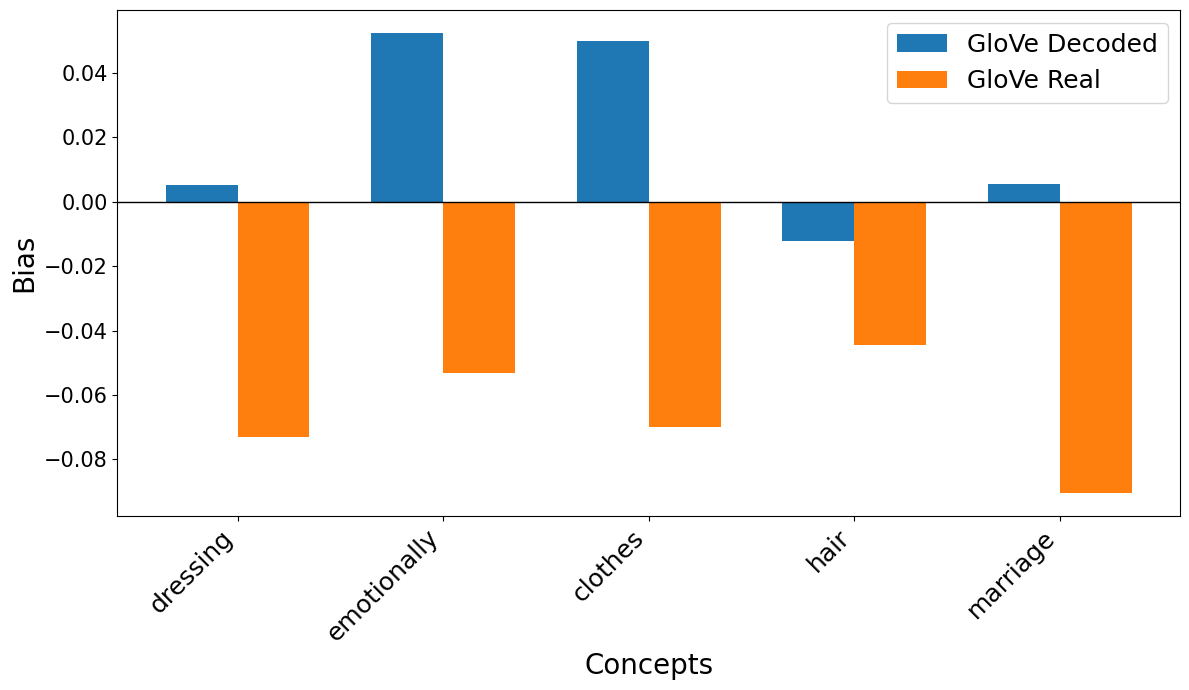

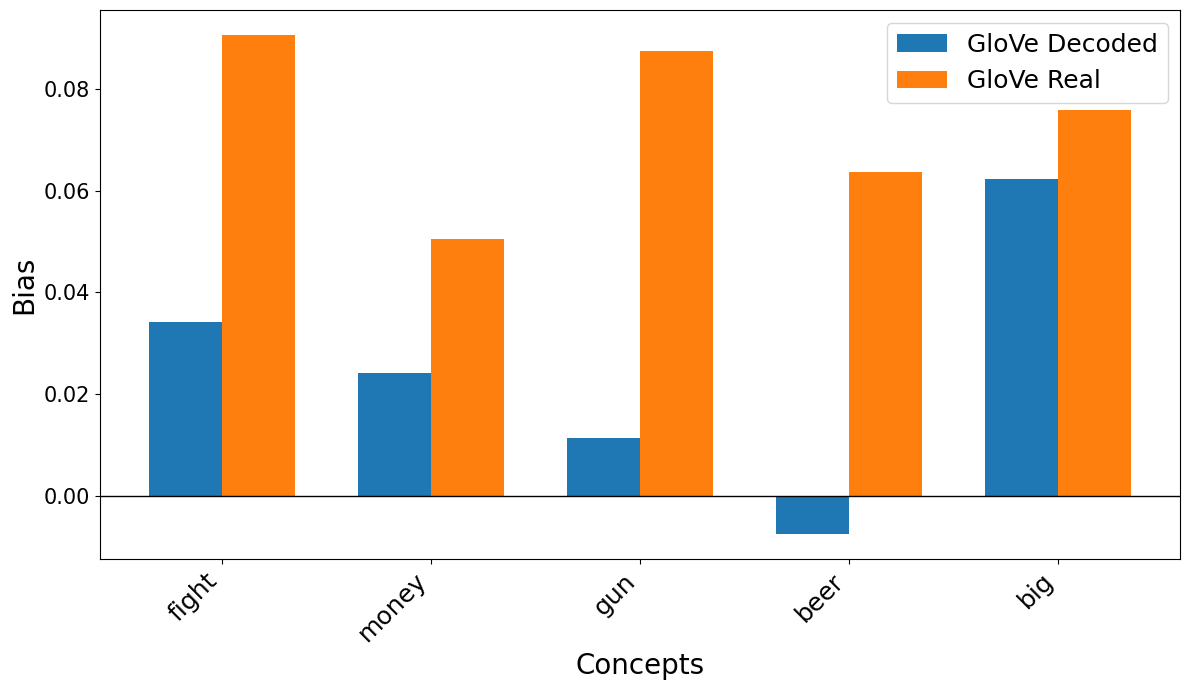

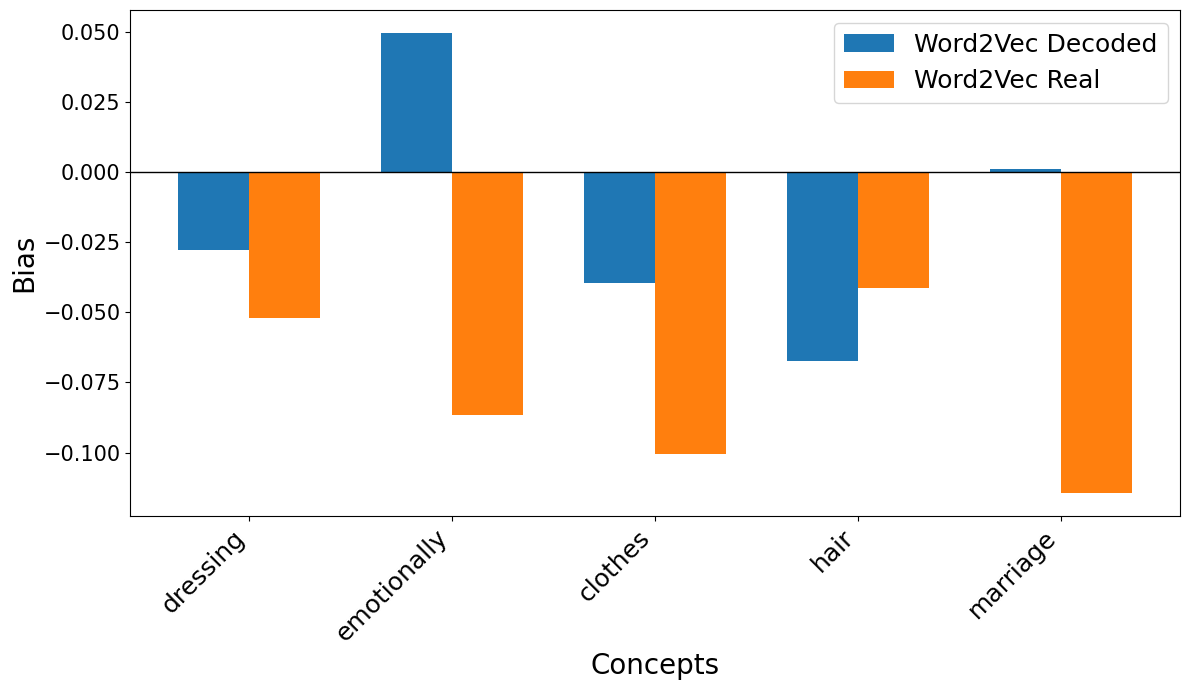

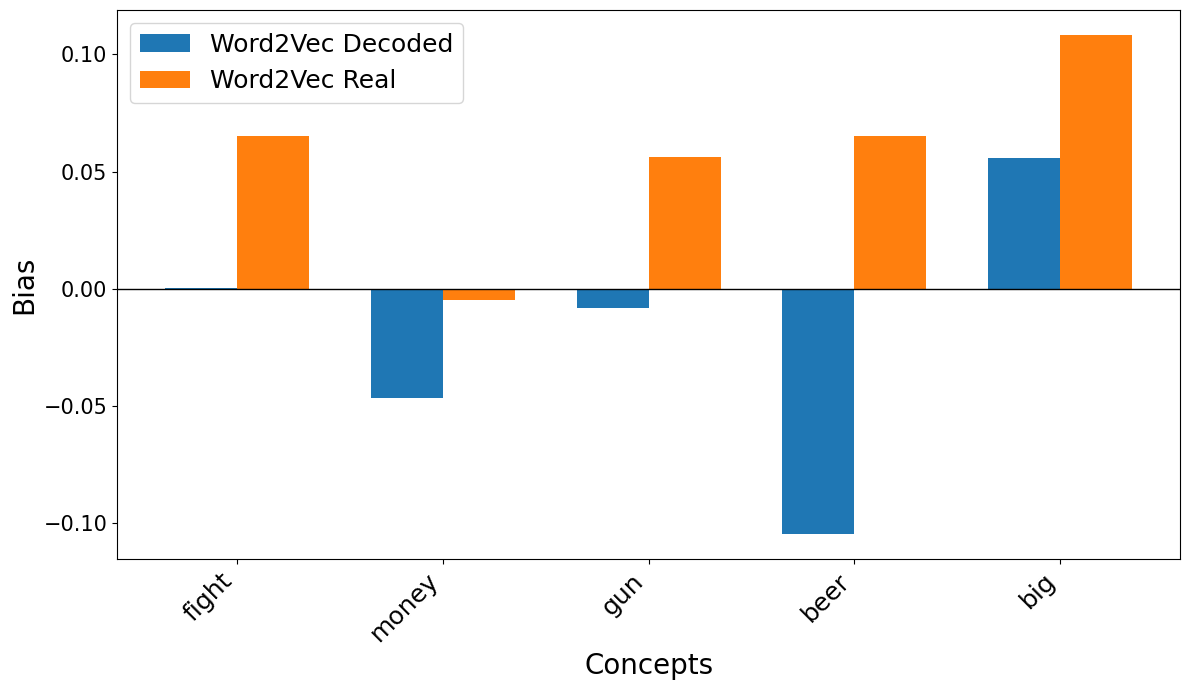

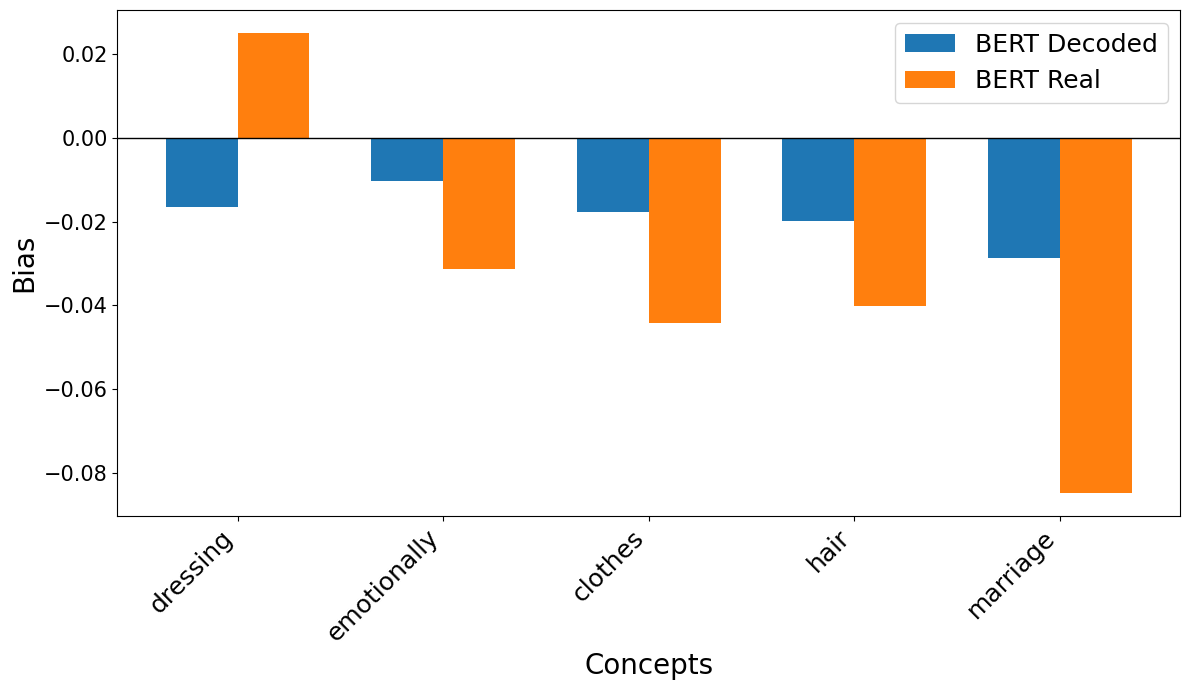

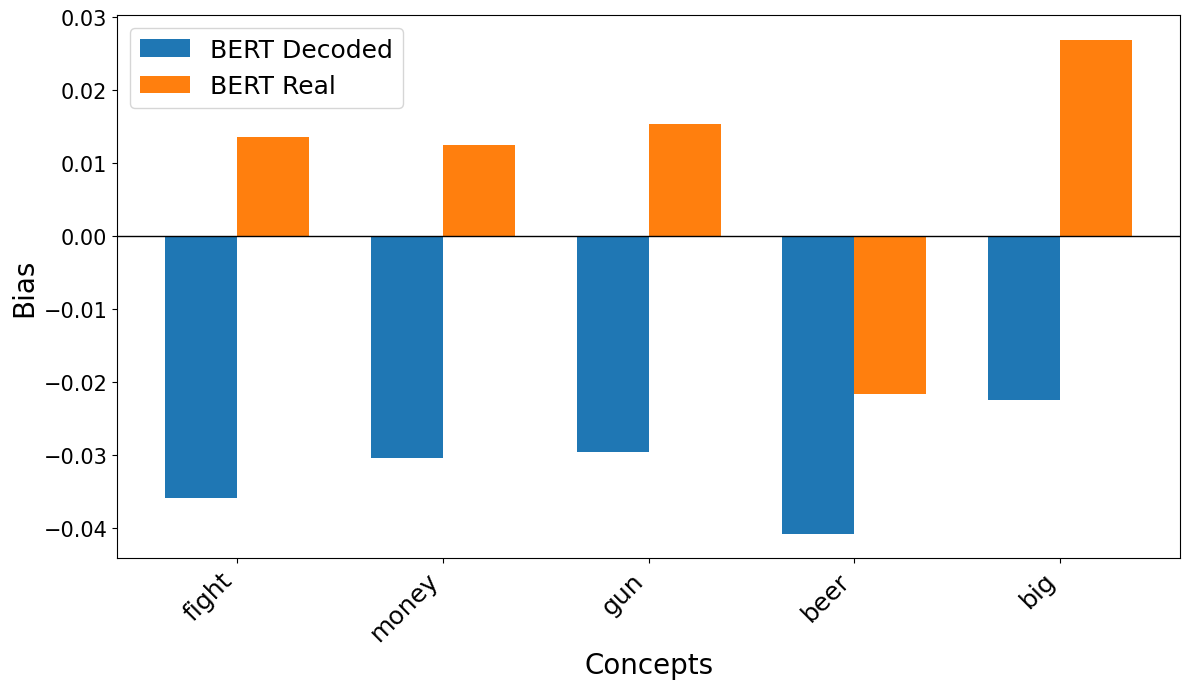

In [54]:
mean_biases = {}
for model_name, (data, vectors, fem_vector, masc_vector) in models.items():
    mean_predicted_bias_fem, mean_true_bias_fem = calculate_mean_bias(fem_concepts, data, vectors, fem_vector, masc_vector, concepts,"Feminine",model_name)
    mean_predicted_bias_masc, mean_true_bias_masc = calculate_mean_bias(masc_concepts, data, vectors, fem_vector, masc_vector, concepts,"Masculine",model_name)

    mean_biases[model_name] = {
        "Feminine(Decoded)": mean_predicted_bias_fem,
        "Feminine(Real)": mean_true_bias_fem,
        "Masculine(Decoded)": mean_predicted_bias_masc,
        "Masculine(Real)": mean_true_bias_masc
    }

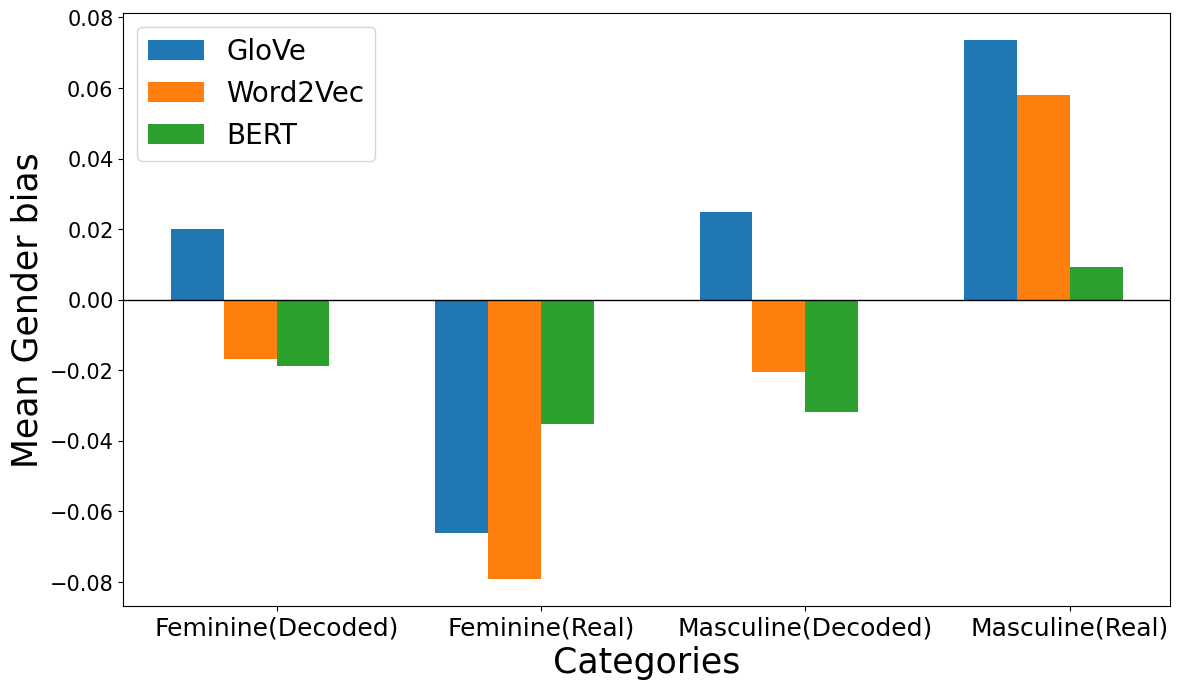

In [55]:


categories = ["Feminine(Decoded)", "Feminine(Real)", "Masculine(Decoded)", "Masculine(Real)"]
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

for i, (model_name, biases) in enumerate(mean_biases.items()):
    offsets = (i - len(mean_biases) / 2) * width
    ax.bar(x + offsets, [biases[cat] for cat in categories], width, label=model_name)

ax.set_xlabel('Categories', fontsize=25)
ax.set_ylabel('Mean Gender bias', fontsize=25)
# ax.set_title('Mean Bias Comparison Across Models', fontsize=16)
ax.set_xticks(x)
ax.axhline(y=0, color='black', linewidth=1)
ax.set_xticklabels(categories, fontsize=18)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(fontsize=20)

plt.tight_layout()
plt.show()

## lack of training data? lets try with more!

In [56]:
data.shape

(180, 170712)

In [57]:
data180 = neural_data_exp1

In [58]:
data180.shape

(180, 185866)

In [59]:
data_384 = exp2_data['Fmridata']

In [60]:
data_384.shape

(384, 185866)

In [61]:
data_243 = exp3_data['Fmridata']

In [62]:
data_243.shape

(243, 185866)

In [63]:

# Combine FMRI data and concepts
FMRI_combined = np.vstack((FMRI_EXP2, FMRI_EXP3))
concepts_combined = concepts_EXP2 + concepts_EXP3

In [64]:
FMRI_combined.shape

(627, 185866)

In [65]:
sentences_file_path = 'stimuli_384sentences.txt'
with open(sentences_file_path, "r") as f:
    sentences_384 = f.readlines()

sentences_file_path = 'stimuli_243sentences.txt'
with open(sentences_file_path, "r") as f:
    sentences_243 = f.readlines()

In [66]:
sentences_combained=sentences_243+sentences_384
sentences_combained[0]

'Beekeeping encourages the conservation of local habitats.\n'

In [67]:
print(vectors_384)

[[ 0.366856 -0.31306   0.028711 ... -0.22306   0.268278  0.199575]
 [ 0.39413  -0.250356  0.042328 ... -0.286633  0.096377 -0.053102]
 [-0.032598  0.25447   0.122252 ...  0.033089 -0.003771  0.167761]
 ...
 [ 0.12136   0.442767 -0.130527 ...  0.122083 -0.084372 -0.022405]
 [-0.234316  0.185497 -0.164314 ... -0.044942  0.162396 -0.002788]
 [-0.16232   0.284525 -0.19418  ... -0.074766  0.098054  0.233641]]


In [68]:
glove_vectors_combined = np.vstack((vectors_243,vectors_384))

In [69]:
glove_vectors_combined.shape

(627, 300)

##glove:

In [70]:
del sentences_243
del sentences_384
del FMRI_EXP2
del FMRI_EXP3
del concepts_EXP2
del concepts_EXP3
del exp3_data
del exp2_data


In [71]:

# Combine FMRI data and concepts
FMRI_combined = np.vstack((data180, FMRI_combined))
concepts_combined = list(concepts) + concepts_combined
glove_vectors_combined = np.vstack((glove_vectors,glove_vectors_combined))

In [72]:
del neural_data_exp1

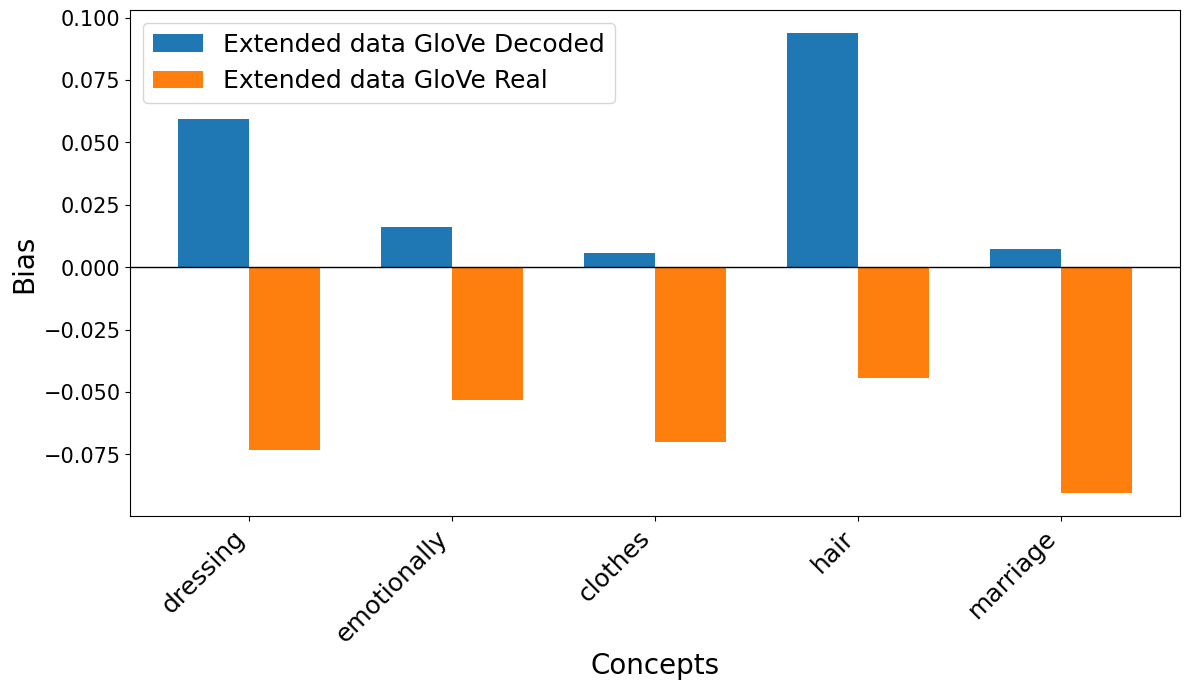

(0.036553301105020954, -0.06613849966396171)

In [73]:
calculate_mean_bias(fem_concepts,FMRI_combined,glove_vectors_combined,glove_fem_vec,glove_masc_vec,np.array(concepts_combined),"Feminine","Extended data GloVe")

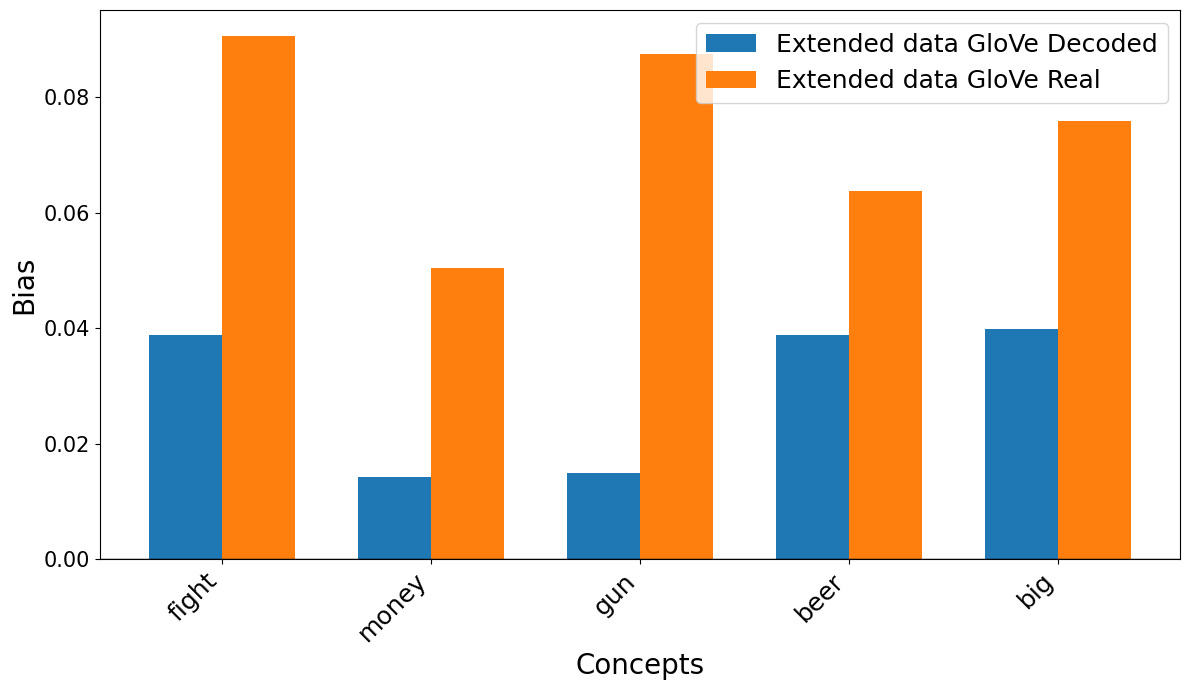

(0.02936350469366984, 0.07364727846854564)

In [74]:
calculate_mean_bias(masc_concepts,FMRI_combined,glove_vectors_combined,glove_fem_vec,glove_masc_vec,np.array(concepts_combined),"Masculine","Extended data GloVe")

In [75]:
del FMRI_combined
del glove_vectors_combined

# pair-wise comperesion of brain data

In [76]:
fem_concepts=["dressing","emotionally","clothes","hair","marriage"]
masc_concepts=["fight","money","gun","beer","big"]

In [77]:
indices= np.array(range(180))

In [78]:
mask = np.isin(concepts, fem_concepts)

fem_inds = indices[mask]

fem_data = np.take(data180, fem_inds, axis=0)

In [79]:
fem_data

,0,1,2,3,4,5,6,7,8,9,...,185856,185857,185858,185859,185860,185861,185862,185863,185864,185865
30,5.927615,0.997458,2.363722,4.021942,12.486966,7.074160,5.609855,5.220205,2.792427,-1.388491,...,3.364478,-7.915141,-31.390379,-45.543630,-27.764046,-38.406820,-19.997367,-28.541626,-18.554232,-22.333082
56,5.527983,2.789404,4.846739,10.264147,4.108608,3.653222,6.178796,7.292910,7.416240,3.860401,...,0.387957,1.922225,0.995963,-0.436340,5.124239,4.815884,5.026034,7.586421,0.904289,1.525812
63,-15.084263,-14.150178,-16.213204,-15.963376,-16.454997,-10.275474,-9.353635,-14.457358,-21.982474,-28.817327,...,29.617824,26.258576,15.146203,10.871915,17.175401,24.531362,13.850566,28.580042,11.387751,23.183269
77,-18.875293,-18.264128,-16.378972,-10.840875,-6.398594,-6.704763,0.120517,3.891065,6.316386,8.190624,...,28.265442,30.017606,19.381371,19.673368,27.925580,19.692003,27.089320,18.614179,26.623477,21.662343
99,1.410644,1.911043,0.441896,3.204368,-4.962571,0.372380,3.136115,0.457659,0.327099,3.252228,...,-8.727970,-6.343280,2.082045,7.588795,-3.409840,11.914747,-15.235866,7.859001,-16.384990,0.782765


In [80]:
mask = np.isin(concepts, masc_concepts)

masc_inds = indices[mask]

masc_data = np.take(data180, masc_inds, axis=0)

In [81]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# Calculate cosine similarity (1 - cosine distance) from rows in the same dataframe
cosine_sim_fem_data = 1 - cdist(fem_data, fem_data, metric='cosine')
print(cosine_sim_fem_data)
np.fill_diagonal(cosine_sim_fem_data, np.nan)  # Set diagonal to NaN
mean_sim_same_fem_data = np.nanmean(cosine_sim_fem_data, axis=1)  # Mean excluding NaN values

cosine_sim_masc_data = 1 - cdist(masc_data, masc_data, metric='cosine')
np.fill_diagonal(cosine_sim_masc_data, np.nan)  # Set diagonal to NaN
mean_sim_same_masc_data = np.nanmean(cosine_sim_masc_data, axis=1)  # Mean excluding NaN values
print(mean_sim_same_fem_data)

# Calculate cosine similarity (1 - cosine distance) from rows in the other dataframe
mean_sim_other_fem_data = (1 - cdist(fem_data, masc_data, metric='cosine')).mean(axis=1)
mean_sim_other_masc_data = (1 - cdist(masc_data, fem_data, metric='cosine')).mean(axis=1)

# Add these as new columns to the dataframes
fem_data['mean_sim_fem'] = mean_sim_same_fem_data
fem_data['mean_sim_masc'] = mean_sim_other_fem_data

masc_data['mean_sim_masc'] = mean_sim_same_masc_data
masc_data['mean_sim_fem'] = mean_sim_other_masc_data


[[ 1.          0.0039112  -0.09246913  0.01306441  0.17972824]
 [ 0.0039112   1.          0.4062682   0.33577355 -0.08076193]
 [-0.09246913  0.4062682   1.          0.44814771  0.45013057]
 [ 0.01306441  0.33577355  0.44814771  1.          0.04539271]
 [ 0.17972824 -0.08076193  0.45013057  0.04539271  1.        ]]
[0.02605868 0.16629775 0.30301934 0.2105946  0.1486224 ]


In [82]:
fem_data['concept'] = np.array(concepts)[fem_inds]

masc_data['concept'] = np.array(concepts)[masc_inds]

In [83]:
fem_data[["concept",'mean_sim_fem','mean_sim_masc']]

,concept,mean_sim_fem,mean_sim_masc
30,clothes,0.026059,0.298134
56,dressing,0.166298,0.274001
63,emotionally,0.303019,0.391552
77,hair,0.210595,0.310970
99,marriage,0.148622,0.182503


In [84]:
masc_data[["concept",'mean_sim_fem','mean_sim_masc']]

,concept,mean_sim_fem,mean_sim_masc
15,beer,0.345859,0.341830
16,big,0.198381,0.276001
69,fight,0.299717,0.268645
76,gun,0.264521,0.275931
104,money,0.348682,0.311757


#economic bias

In [85]:
jobs= ["doctor",
"driver",
"cook",
"science",
"student"]

In [86]:
def eco_bias(bias_concepts, data, vectors, concepts,bais_word):
    indices = np.array(range(len(concepts)))

    bias_our = []
    bias_mixed = []
    bias_real = []
    concept_names = []

    for i in bias_concepts:
        mask = np.isin(concepts, [i, bais_word])

        test_inds = indices[mask]
        train_inds = indices[~mask]

        data_test_vectors = np.take(data, test_inds, axis=0)
        data_train_vectors = np.take(data, train_inds, axis=0)
        semantic_test_vectors = np.take(vectors, test_inds, axis=0)
        semantic_train_vectors = np.take(vectors, train_inds, axis=0)

        model = learn_decoder(data_train_vectors, semantic_train_vectors)

        # Corrected our_pred assignment
        our_pred = np.dot(data_test_vectors[0], model)  # Assuming model is a linear transformation matrix
        our_money = np.dot(data_test_vectors[1], model)
        true_concept = semantic_test_vectors[0]
        true_money = semantic_test_vectors[1]

        # Calculate cosine similarities
        cosine_our = 1 - cdist([our_pred], [our_money], metric='cosine')[0][0]
        cosine_mixed = 1 - cdist([our_pred], [true_money], metric='cosine')[0][0]
        cosine_true = 1 - cdist([true_concept], [true_money], metric='cosine')[0][0]

        # Store results
        bias_our.append(cosine_our)
        bias_mixed.append(cosine_mixed)
        bias_real.append(cosine_true)
        concept_names.append(i)

        del test_inds, train_inds, data_test_vectors, data_train_vectors, semantic_test_vectors, semantic_train_vectors, model

    # Plotting the results
    x = np.arange(len(concept_names))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width, bias_our, width, label='Our Predicted')
    bars3 = ax.bar(x + width, bias_real, width, label='True')

    ax.set_xlabel('Concepts')
    ax.set_ylabel('Cosine Similarity')
    ax.set_title('Economic Bias in Concepts')
    ax.set_xticks(x)
    ax.set_xticklabels(concept_names, rotation=45, ha="right")
    ax.legend()

    plt.tight_layout()
    plt.show()
    plt.close()

    # Print mean cosine similarities
    print("Mean Cosine Similarities")
    print("Our Predicted:", np.mean(bias_our))
    print("True:", np.mean(bias_real))

    del bias_our, bias_mixed, bias_real

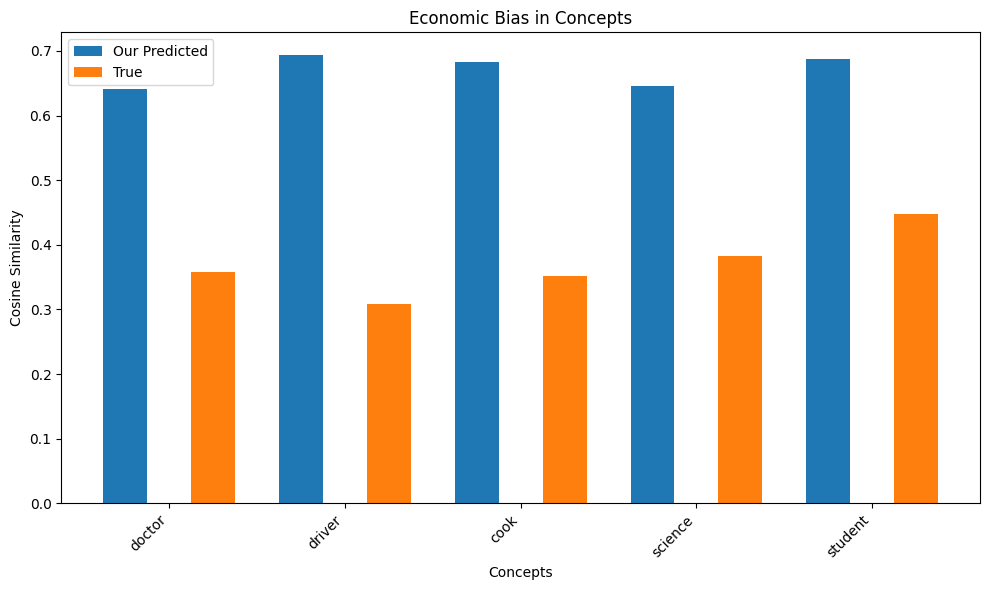

Mean Cosine Similarities
Our Predicted: 0.6705180685249242
True: 0.369385158081969


In [87]:
eco_bias(jobs,data,glove_vectors,concepts,"money")

#eco FMRI

In [88]:
mask = np.isin(concepts, jobs)

jobs_inds = indices[mask]

jobs_data = np.take(data180, jobs_inds, axis=0)

In [89]:
mask = np.isin(concepts, ["money"])

bais_inds = indices[mask]

bais_data = np.take(data180, bais_inds, axis=0)
bais_data

,0,1,2,3,4,5,6,7,8,9,...,185856,185857,185858,185859,185860,185861,185862,185863,185864,185865
104,-17.334077,-14.620522,-20.415798,-22.604552,-17.103016,-10.498607,-11.415728,-18.642627,-21.343695,-22.386242,...,-7.933449,8.751442,0.023902,0.298037,-5.841312,0.798497,-12.430827,2.139509,-11.983923,1.879131


In [90]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist


mean_sim_other_jobs_data = (1 - cdist(jobs_data, bais_data, metric='cosine'))

# Add these as new columns to the dataframes
jobs_data['mean_sim_fem'] = mean_sim_other_jobs_data
jobs_data

,0,1,2,3,4,5,6,7,8,9,...,185857,185858,185859,185860,185861,185862,185863,185864,185865,mean_sim_fem
36,0.687507,-0.565040,0.890270,5.654787,3.820499,2.542878,0.568112,-0.572821,3.384618,5.319850,...,2.322938,5.728440,7.244588,6.119186,12.136558,6.215688,15.272996,8.000573,12.757056,0.347470
54,-19.232124,-12.471559,-20.118670,-24.620396,-21.996119,-13.193486,-11.370513,-17.841115,-23.311537,-27.026693,...,28.932385,18.301486,16.524343,21.296282,22.783311,16.357372,23.104409,14.174549,22.327809,0.458805
57,-12.660749,-10.327192,-15.163770,-17.733703,-14.015553,-12.614226,-16.664117,-22.903050,-23.118003,-23.223723,...,29.791666,12.803786,19.673754,12.534209,33.271295,10.369589,36.504312,9.601728,29.692036,0.429532
134,15.751073,14.515414,20.237636,25.566737,16.074658,7.348954,6.467362,10.039004,16.232571,13.554403,...,8.667870,-6.827635,-22.206884,-2.965632,-19.770655,2.574646,-14.089137,0.952362,-8.038694,0.205419
153,-18.369171,-16.772960,-20.077782,-20.556926,-18.515876,-11.451265,-9.584729,-12.795057,-17.453582,-24.644648,...,3.678068,-3.831799,2.640405,-7.708587,13.102143,-16.859120,9.746214,-14.030622,4.235499,0.471916


In [91]:
jobs_data['concept'] = np.array(concepts)[jobs_inds]

In [92]:
jobs_data[["concept",'mean_sim_fem']]

,concept,mean_sim_fem
36,cook,0.347470
54,doctor,0.458805
57,driver,0.429532
134,science,0.205419
153,student,0.471916


# Export to PDF

Run the following cell to download the notebook as a nicely formatted pdf file.

In [93]:
# Add to a new cell at the end of the notebook and run the follow code,
# which will save the notebook as pdf in your google drive (allow the permissions) and download it automatically.

!wget -nc https://raw.githubusercontent.com/lacclab/colab-pdf/master/colab_pdf.py

from colab_pdf import colab_pdf

# If you saved the notebook in the default location in your Google Drive,
# and didn't change the name of the file, the code should work as is.
# If not, adapt accordingly.

# colab_pdf(file_name='Copy of Pset_3.ipynb', notebookpath="/content/drive/MyDrive/Colab Notebooks/")

File ‘colab_pdf.py’ already there; not retrieving.

